In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [44]:
data=pd.read_csv('datasets.csv',encoding_errors='ignore')

In [45]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [58]:
#Dropping null values
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [59]:
data.shape

(20724, 22)

In [61]:
#Dropping duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [63]:
data.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [68]:
#Type casting

data['id']=data['id'].astype(object)
data['host_id']=data['host_id'].astype(object)
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [71]:
###EDA
#Univariate Analysis


<Axes: xlabel='price'>

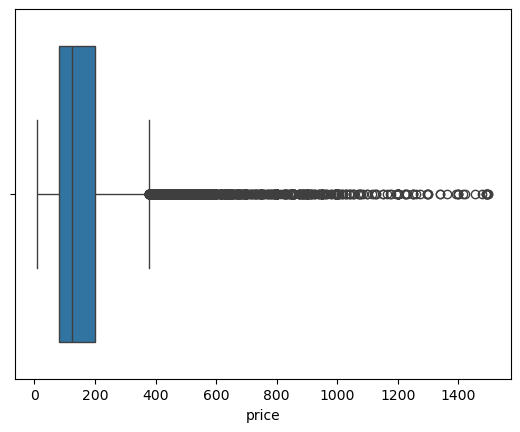

In [85]:
#Outliers

df=data[data['price']<1500]
sns.boxplot(data=df,x='price')

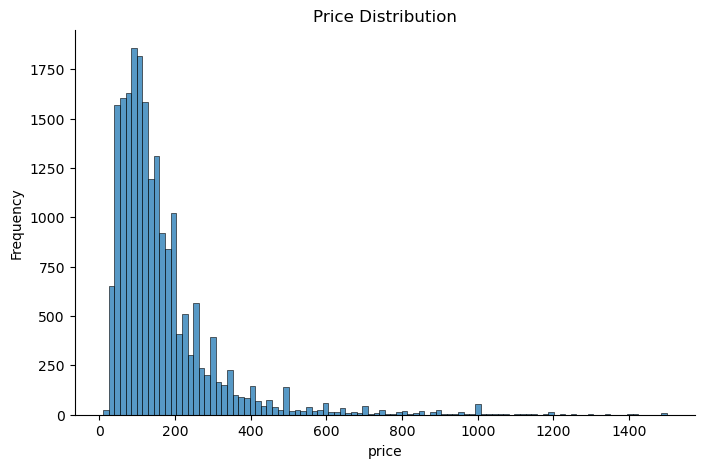

In [94]:
#Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='price',bins=100)
sns.despine()
plt.title("Price Distribution")
plt.ylabel('Frequency')
plt.show()

In [92]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

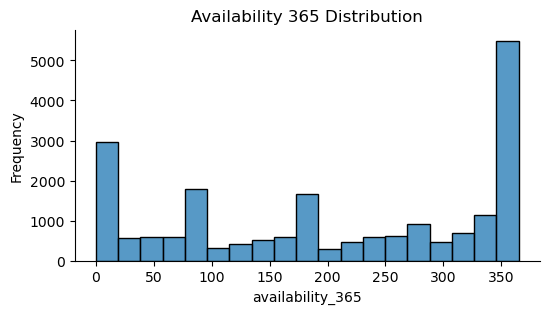

In [97]:
#Availability 365 Distribution
plt.figure(figsize=(6,3))
sns.histplot(data=df,x='availability_365')
sns.despine()
plt.title("Availability 365 Distribution")
plt.ylabel('Frequency')
plt.show()

In [115]:
#['price_per_bed']
df['price_per_bed']=df['price']/ df['beds']
df['price_per_bed']
df.groupby(by='neighbourhood_group')['price_per_bed'].mean()

C:\Users\DIVYA K BANJARE\AppData\Local\Temp\ipykernel_36260\3984637403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_bed']=df['price']/ df['beds']


neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price_per_bed, dtype: float64

In [117]:
#Bivariate Analysis
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price_per_bed'],
      dtype='object')

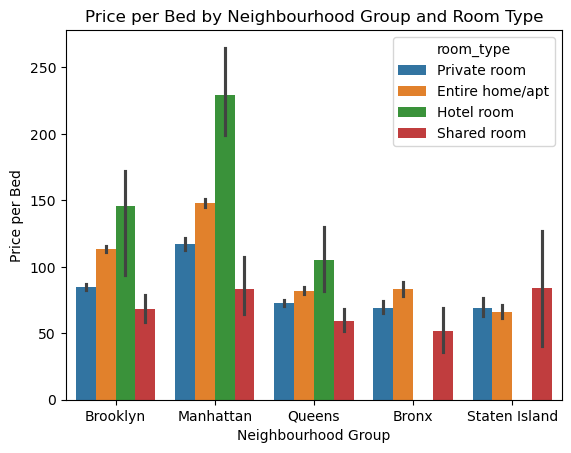

In [123]:
#Price depending on neighbourhood group and room type
sns.barplot(data=df,x='neighbourhood_group',y='price_per_bed',hue='room_type')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price per Bed")
plt.title("Price per Bed by Neighbourhood Group and Room Type")
plt.show()

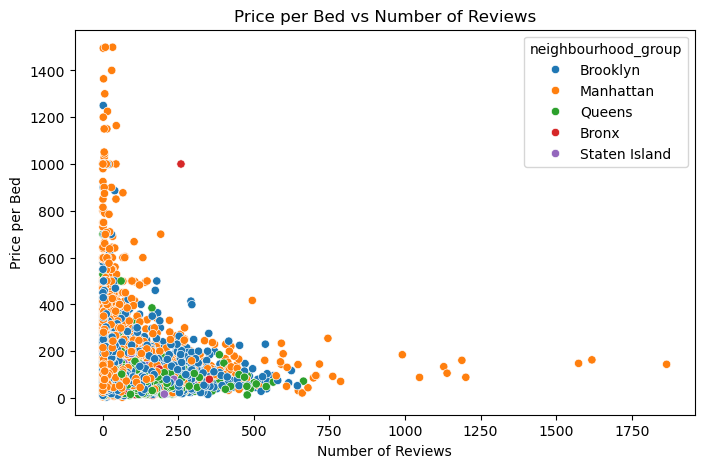

In [133]:
#Number iof reviews and price rel
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='number_of_reviews',y='price_per_bed',hue='neighbourhood_group')
plt.title("Price per Bed vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price per Bed")
plt.show()

In [134]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price_per_bed                     float64
dtype: object

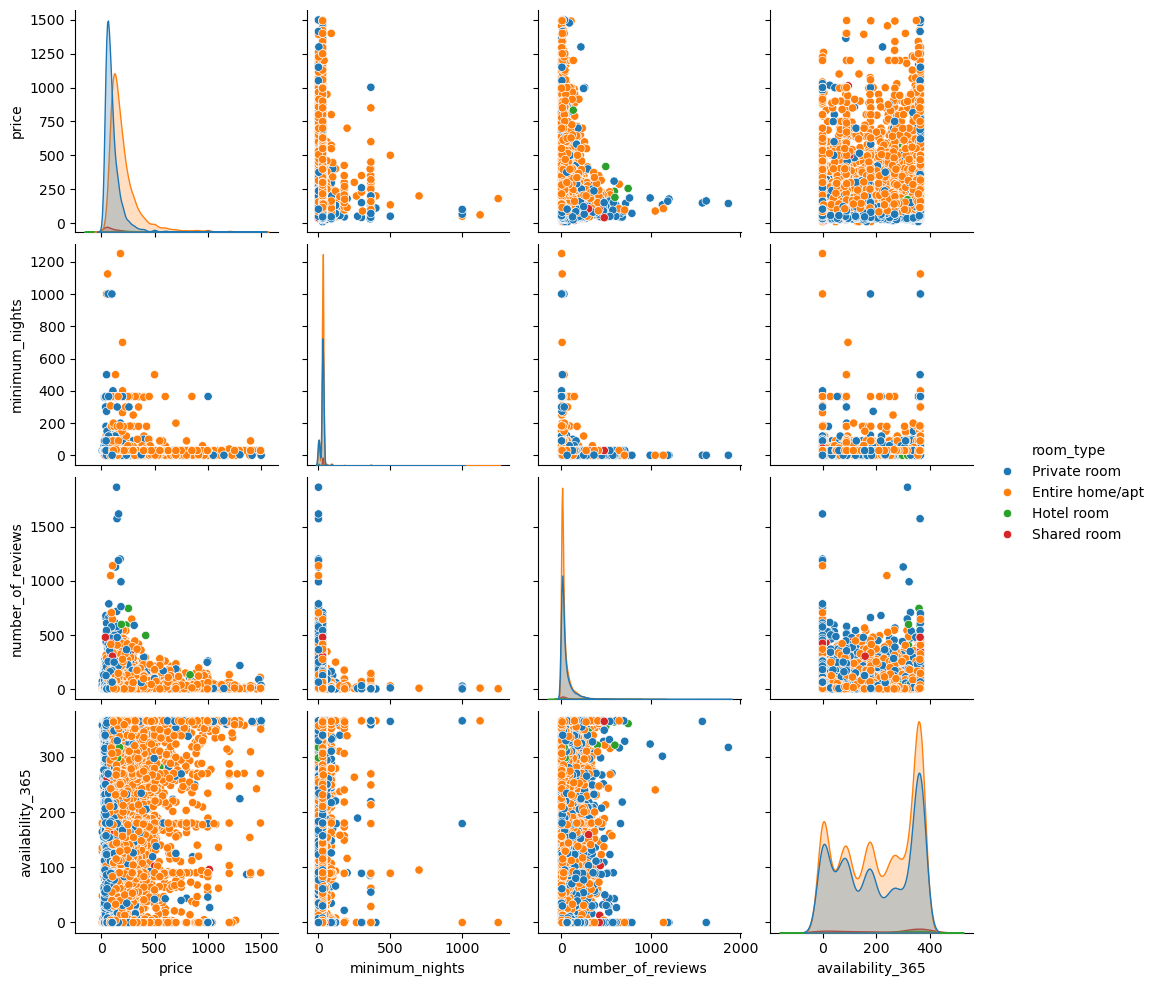

In [136]:
sns.pairplot(df,vars=['price','minimum_nights','number_of_reviews','availability_365'],hue='room_type')

Text(0.5, 1.0, 'Geographical Distribution of Listings')

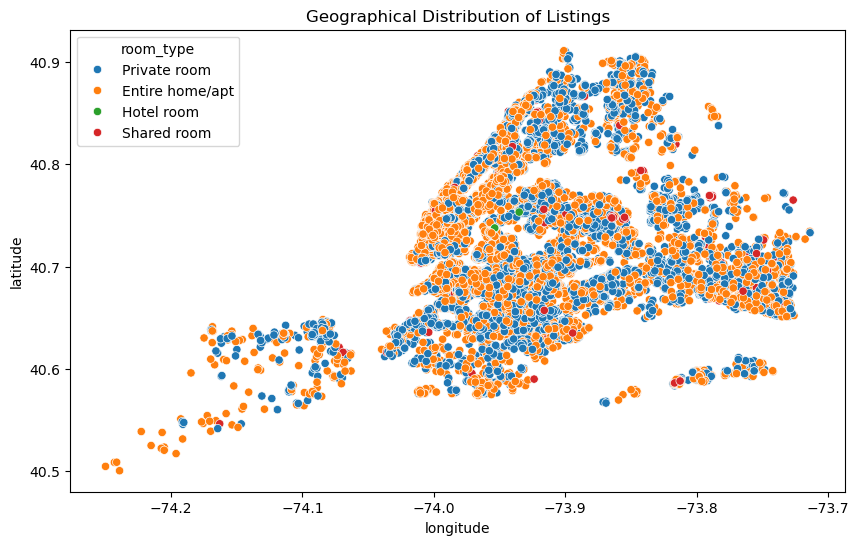

In [141]:
#Geographical Distribution
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='longitude',y='latitude',hue='room_type')
plt.title("Geographical Distribution of Listings")

In [ ]:
#Heat Map - coorelation of one variable with another for numerical columns
corr=df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','beds']].corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds
latitude,1.000000,0.047369,0.012686,0.004590,-0.047953,-0.041673,-0.005941,-0.071753
longitude,0.047369,1.000000,-0.193728,0.023890,0.004820,0.041720,0.063523,0.041832
price,0.012686,-0.193728,1.000000,-0.044635,-0.043533,-0.012775,0.048036,0.415278
minimum_nights,0.004590,0.023890,-0.044635,1.000000,-0.059049,-0.122509,0.035466,-0.025852
number_of_reviews,-0.047953,0.004820,-0.043533,-0.059049,1.000000,0.631005,-0.049656,0.040071
reviews_per_month,-0.041673,0.041720,-0.012775,-0.122509,0.631005,1.000000,-0.040116,0.053496
availability_365,-0.005941,0.063523,0.048036,0.035466,-0.049656,-0.040116,1.000000,0.065985
beds,-0.071753,0.041832,0.415278,-0.025852,0.040071,0.053496,0.065985,1.000000


<Figure size 1000x600 with 0 Axes>

<Axes: >

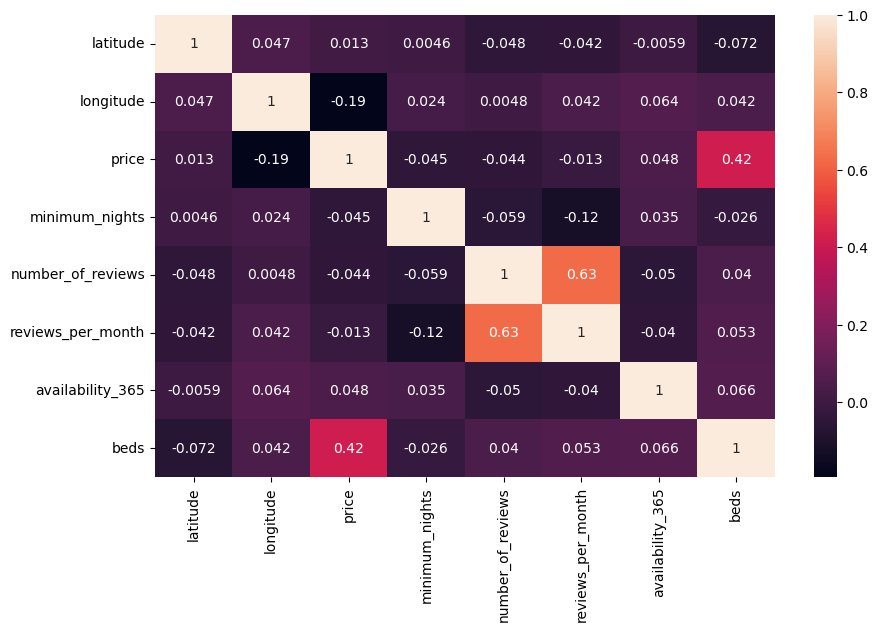

In [150]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)